In [1]:
import pandas as pd

In [2]:
Advertising=pd.read_csv("Advertising.csv")
df=Advertising.copy()
df=pd.DataFrame(df)
df=df.iloc[:,1:len(df)]

#Csv file readed and df created

In [3]:
df.head()
#First 5 item of df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe().T
#General statistical properties of df 

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.corr()
#It gives us correlation relationship between variables

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


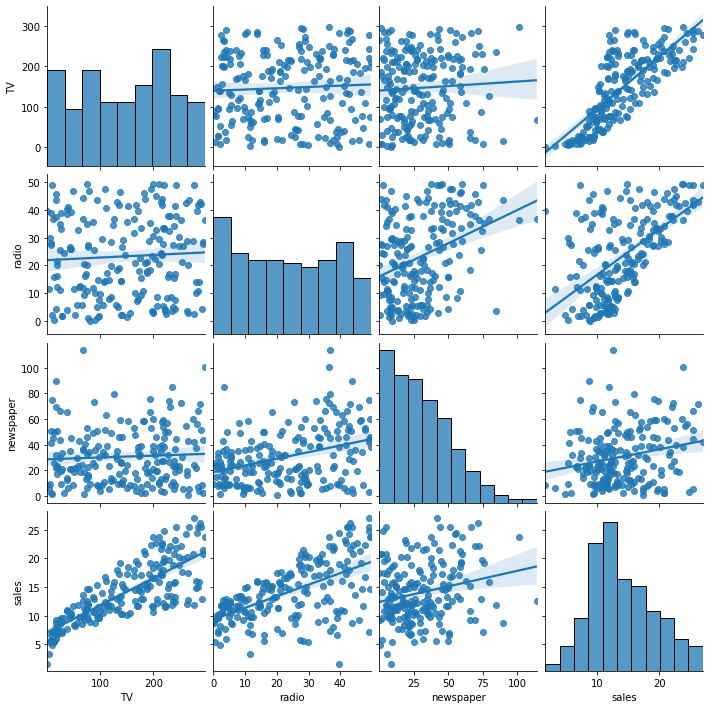

In [6]:
import seaborn as sns
sns.pairplot(df,kind="reg")
#imported seaborn library in order to visualize our data
#We used pairplot regression graph for observe relationships that fitting our model
#As we can see TV and sales relationship is fitting our basic regression model

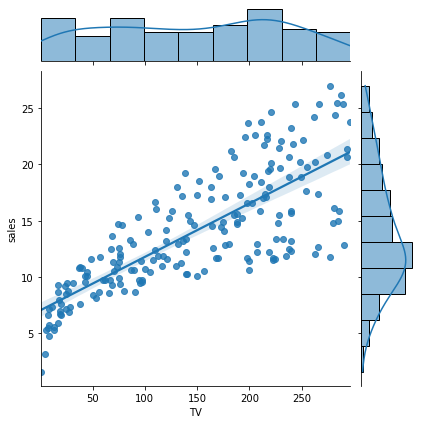

In [7]:
sns.jointplot(x="TV", y="sales",data=df,kind="reg")

## Modelling with statsmodels

In [8]:
import statsmodels.api as sm

In [9]:
X=df[["TV"]]
X[0:5]
#We assigned TV as X variable.
#We could access first 5 X values 

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
X=sm.add_constant(X)
#We want to observe the estimated values of y according to the change of x.

In [11]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [12]:
y=df[["sales"]]
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [13]:
lm=sm.OLS(y,X)
#OLS:Ordinary Least Squares

### Ordinary Least Squares <br>
Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.<br>
<br>
In this entry, OLS regression will be discussed in the context of a bivariate model, that is, a model in which there is only one independent variable ( X ) predicting a dependent variable ( Y ). However, the logic of OLS regression is easily extended to the multivariate model in which there are two or more independent variables.

In [14]:
model=lm.fit()

In [15]:
model.summary()
#We can see the summary of the model that includes significant points for us. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        20:45:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        20:45:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params
#There are 2 model param Intercept and TV
#Intercept is b0 value as we write in the regression formula
#TV is b1 coefficent for us

Intercept    7.032594
TV           0.047537
dtype: float64

In [18]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [19]:
model.f_pvalue 
#our pvalue

1.4673897001947095e-42

In [20]:
print("f_pvalue: ","%.3f" %model.f_pvalue)

f_pvalue:  0.000


In [21]:
print("tvalue: ","%2.f" % model.tvalues[0:1])

tvalue:  15


In [22]:
model.mse_model

3314.6181668686486

In statistics, the mean squared error (MSE)[1] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

In [23]:
model.rsquared_adj

0.6099148238341623

<b>Adjusted R-squared</b> is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.


In [24]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [25]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [26]:
print("Sales =" + str("%.2f" % model.params[0]) + " + TV" +"*" + str("%.2f" % model.params[1]))
#We could rewrite our formula by putting in right place our intercept(b0) and TV(b1) coefficent. 

Sales =7.03 + TV*0.05


In [27]:
import seaborn as sns


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Tv Spendings')

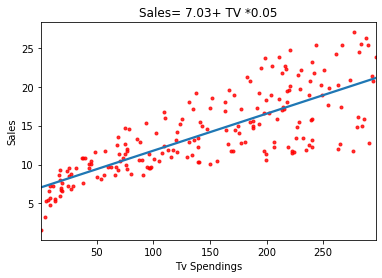

In [28]:
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={"color":"r",'s':9});
g.set_title("Sales= "+str("%.2f" % model.params[0])+ "+ TV *"+str("%.2f" % model.params[1]));
g.set_ylabel("Sales")
g.set_xlabel("Tv Spendings")

## Prediction

Sales=7.03+TV*0.04 <br>
What is the estimated value of sales when 30 units of TV are spend?

In [29]:
from sklearn.linear_model import LinearRegression
X=df[["TV"]]
y=df[["sales"]]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_
model.coef_

array([[0.04753664]])

In [30]:
model.predict([[30]]) #We can easily predict our result 

array([[8.45869276]])

In [31]:
new_data=[[5],[90],[200]]

In [32]:
model.predict(new_data)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

## Resiudal Values And Machiene Learning

In [33]:
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
lm=smf.ols("sales ~ TV",df)
model=lm.fit()

In [35]:
mse=mean_squared_error(y,model.fittedvalues)

In [36]:
mse

10.512652915656757

In [37]:
import numpy as np
rmse=np.sqrt(mse)

In [38]:
rmse

3.2423221486546887

In [39]:
reg.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [41]:
y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [45]:
model.resid
#Our 

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64